# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd

df = pd.read_csv('./train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [3]:
def num_nans(df):
    """
    Returns the number of rows with at least one empty column value
    """
    return len(df[df.isna().any(axis= 1)])

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [4]:
print(df.columns)

def drop_na(df):
    """
    """
    return df.drop(columns=[col for col in df if (df[col].isna().sum() > 200)])

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [5]:
def to_numerical(df):
    return df['Sex'].replace({'male': 1, 'female': 0})

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [6]:
def extract_names(df):
    """
    """
    # your code here
    first_name, middle_name, last_name, title = [], [], [], []
    # print(df.loc[1, 'Name'].split())
    
    for entry in df.loc[:, 'Name']:
        names = entry.split()
        last_name.append(names[0].strip(',.'))
        title.append(names[1].strip(',.'))
        first_name.append(names[2].strip(',.'))
        if len(names) >= 4:
            middle_name.append(names[3].strip(',.'))
        else:
            middle_name.append('')
    
    return pd.DataFrame({'First Name': first_name, 'Middle Name': middle_name, 'Last Name': last_name, 'Title': title})

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

# ????

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [7]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C,Nicholas,(Adele,Nasser,Mrs


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

<AxesSubplot:>

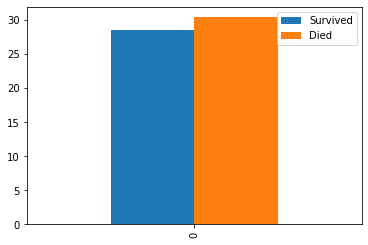

In [8]:
# your code here
# %matplotlib inline
import matplotlib.pyplot as plt

newDF = pd.DataFrame(data={
    'Survived': [df['Age'][df['Survived'].isin([1])].mean()], 
    'Died': [df['Age'][df['Survived'].isin([0])].mean()]
})

newDF.plot(kind='bar')

# df.plot(x= 'Survived', y='Age', kind='bar')


-> your answer here

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

<AxesSubplot:>

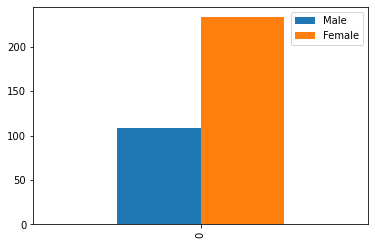

In [9]:
# your code here
males, females = 0, 0

for entry in df['Sex'][df['Survived'].isin([1])]:
    if entry:
        males += 1
    else:
        females += 1

newDF = pd.DataFrame({
    'Male': [males],
    'Female': [females],
})

newDF.plot(kind='bar')

-> your answer here

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<AxesSubplot:>

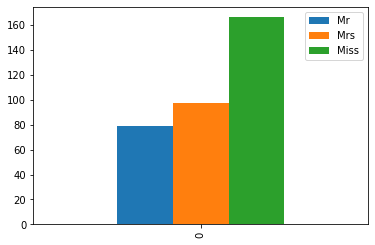

In [10]:
# your code here
mr, mrs, miss = 0, 0, 0
for title in df['Title'][df['Survived'].isin([1])]:
    if title == 'Mr':
        mr += 1
    elif title == 'Mrs':
        mrs += 1
    else:
        miss += 1

newDF = pd.DataFrame({
    'Mr': [mr],
    'Mrs': [mrs],
    'Miss': [miss],
})

newDF.plot(kind='bar')

# newDF.head(10)

-> your answer here

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:>

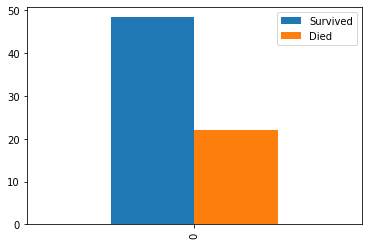

In [2]:
# your code here
newDF = pd.DataFrame({
    'Survived': [df['Fare'][df['Survived'].isin([1])].mean()],
    'Died': [df['Fare'][df['Survived'].isin([0])].mean()],
})

newDF.plot(kind='bar')

-> your answer here

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:>

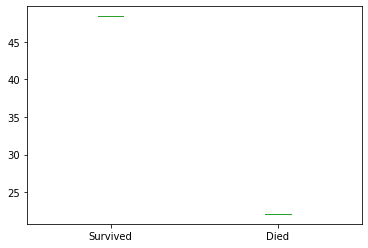

In [3]:
# your code here
newDF.plot(kind='box')
# ????

-> your answer here

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [ ]:
# your code here
df.head()

l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [ ]:
df = # < your code here >

m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [ ]:
def N_most_similar(df, N):
    return # < your code here >

print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [35]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get('Python')
data_science = get('Data Science')
data_analytics = get('Data Analysis')
machine_learning = get('Machine Learning')
deep_learning = get('Deep Learning')

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [36]:
# your code here

python = pd.json_normalize(python['items'])
python.to_csv('python.csv')

data_science = pd.json_normalize(data_science['items'])
data_science.to_csv('data_science.csv')

data_analytics = pd.json_normalize(data_analytics['items'])
data_analytics.to_csv('data_analytics.csv')

machine_learning = pd.json_normalize(machine_learning['items'])
machine_learning.to_csv('machine_learning.csv')

deep_learning = pd.json_normalize(deep_learning['items'])
deep_learning.to_csv('deep_learning.csv')

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [40]:
# your code here
# dfs = [python, data_science, data_analytics, machine_learning, deep_learning]

# for df in dfs:
#     df = df.rename(columns={
#         'volumeInfo.title': 'Title',
#         'volumeInfo.authors': 'Authors'
#     })

python = python.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

data_science = data_science.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

data_analytics = data_analytics.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

machine_learning = machine_learning.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

deep_learning = deep_learning.rename(columns={
    'volumeInfo.title': 'Title',
    'volumeInfo.authors': 'Authors'
})

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [46]:
# your code here
python['Topic'] = ['python'] * len(python)
data_science['Topic'] = ['data_science'] * len(data_science)
data_analytics['Topic'] = ['data_analytics'] * len(data_analytics)
machine_learning['Topic'] = ['machine_learning'] * len(machine_learning)
deep_learning['Topic'] = ['deep_learning'] * len(deep_learning)

dfs = [python, data_science, data_analytics, machine_learning, deep_learning]

newDF = pd.concat(dfs)

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [50]:
# your code here
def DataInTitle(df):
    return df[df['Title'].str.contains('Data', regex=False)]

test = DataInTitle(python)
test.head()

,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.panelizationSummary.containsEpubBubbles,volumeInfo.panelizationSummary.containsImageBubbles,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic
7,books#volume,6omNDQAAQBAJ,YsEbwKyL8Xw,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,[Jake VanderPlas],"""O'Reilly Media, Inc.""",2016-11-21,"For many researchers, Python is a first-class ...","[{'type': 'ISBN_13', 'identifier': '9781491912...",...,False,False,59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,python


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [61]:
# your code here
def AuthorsStartingWithE(df):
    temp = []
    for row in df['Authors']:
        row = row[0].split(' ')
        for word in row:
            if word[0] == 'E':
                temp.append(True)
                break
        


    return df
    # return df[df['Authors'].str[0].contains(' ', regex=False)]

test = AuthorsStartingWithE(python)
test.head()

# print(type(python['Authors'][0][0]))

# ???

David M. Beazley
Charles R. Severance
Naomi Ceder
Brett Slatkin
Mark Lutz
TJ O'Connor
Mark Summerfield
Jake VanderPlas
John M. Zelle
Al Sweigart


,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.panelizationSummary.containsEpubBubbles,volumeInfo.panelizationSummary.containsImageBubbles,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic
0,books#volume,Chr1NDlUcI8C,7gYdr7IdU50,https://www.googleapis.com/books/v1/volumes/Ch...,Python Essential Reference,[David M. Beazley],Addison-Wesley Professional,2009,Presents a guide to the features and library m...,"[{'type': 'ISBN_13', 'identifier': '9780672329...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,python
1,books#volume,zjqzDAEACAAJ,IyybMhWqN9g,https://www.googleapis.com/books/v1/volumes/zj...,Python for Everybody,[Charles R. Severance],NaN,2016-04-09,Python for Everybody is designed to introduce ...,"[{'type': 'ISBN_10', 'identifier': '1530051126...",...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,python
2,books#volume,aTkzEAAAQBAJ,cdy0LLxBQpY,https://www.googleapis.com/books/v1/volumes/aT...,The Quick Python Book,[Naomi Ceder],Simon and Schuster,2018-05-03,Summary This third revision of Manning's popul...,"[{'type': 'ISBN_13', 'identifier': '9781638353...",...,False,False,30.99,USD,30.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/The_Qui...,python
3,books#volume,bTUFCAAAQBAJ,CMV6OVATb/8,https://www.googleapis.com/books/v1/volumes/bT...,Effective Python,[Brett Slatkin],Pearson Education,2015,"""It's easy to start writing code with Python: ...","[{'type': 'ISBN_13', 'identifier': '9780134034...",...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,python
4,books#volume,4pgQfXQvekcC,Z6v1o32bPqE,https://www.googleapis.com/books/v1/volumes/4p...,Learning Python,[Mark Lutz],"""O'Reilly Media, Inc.""",2013-06-12,"Get a comprehensive, in-depth introduction to ...","[{'type': 'ISBN_13', 'identifier': '9781449355...",...,False,False,63.99,USD,63.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,python
